In [5]:
import pandas as pd

#A-preprocessing phase:
#1-turning csv file to a dataframe
data = pd.read_csv("titanic-passengers.csv",delimiter=';')
df=pd.DataFrame(data)
df.set_index('PassengerId', inplace=True)

#pinting the 5 first rows
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [11]:
from sklearn.preprocessing import LabelEncoder
#3-cleaning data

#droping rows where 'Embarked' is Nan since there's only 2
df = df.dropna(subset=['Embarked'])
# Fill missing values with the mean
df['Age'].fillna(data['Age'].mean(), inplace=True)
# Fill missing values in the 'Cabin' column with the most frequent value
most_frequent = df['Cabin'].mode()[0]
df['Cabin'].fillna(most_frequent, inplace=True)

df['FamilySize']=df['Parch']+df['SibSp']
df=df.drop(['Parch','SibSp'],axis=1)

#Label Encoding
df['Survived'] = LabelEncoder().fit_transform(df['Survived'])
df['Sex'] = LabelEncoder().fit_transform(df['Sex']) #male:1 female:0

df

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,
343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,248740,13.0000,B96 B98,S,0
76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,348123,7.6500,F G73,S,0
641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,350050,7.8542,B96 B98,S,0
568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,349909,21.0750,B96 B98,S,4
672,0,1,"Davidson, Mr. Thornton",1,31.000000,F.C. 12750,52.0000,B71,S,1
...,...,...,...,...,...,...,...,...,...,...
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,237736,30.0708,B96 B98,C,1
61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,2669,7.2292,B96 B98,C,0
535,0,3,"Cacic, Miss. Marija",0,30.000000,315084,8.6625,B96 B98,S,0


In [14]:
#1. Apply logistic regression.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X=df[['Pclass','Sex','Age','FamilySize']]
y=df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("accuracy : ",accuracy_score(y_test, y_pred))

accuracy :  0.8033707865168539


<Axes: xlabel='Predicted', ylabel='Actual'>

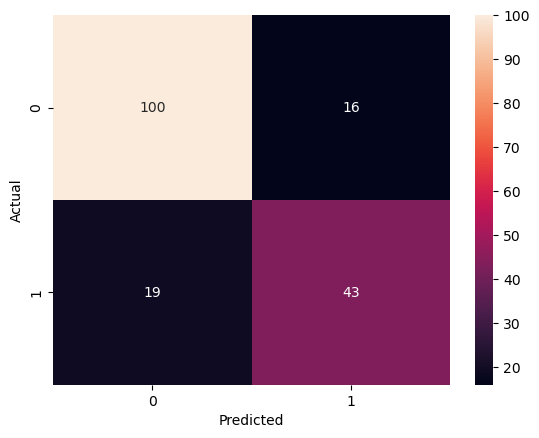

In [18]:
#2. Use a confusion matrix to validate model.
import seaborn as sns

confusion = pd.crosstab(y_test, y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion,annot=True,fmt='d')

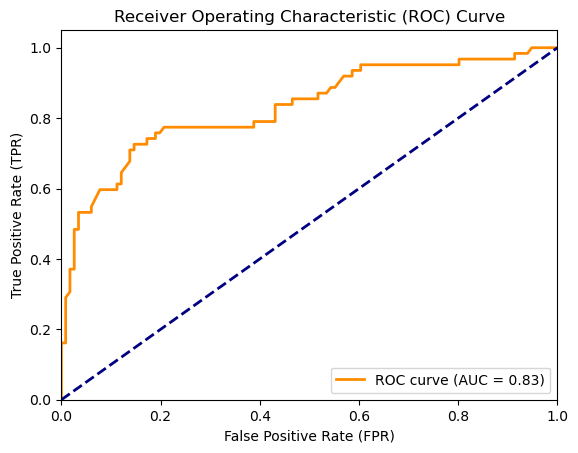

AUC: 0.83


In [24]:
#3. Another validation matrix for classification is ROC / AUC, do your research on them explain them, and apply them in our case.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for class 1 (survived)
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")
